# Importing the required libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import keras
from matplotlib.image import imread
%matplotlib inline

Using TensorFlow backend.


In [5]:
import tensorflow as tf

In [6]:
tf .__version__

'2.1.0'

# Preprocessing and image augmentation

In [7]:
# define the directory of the dataset
directory = "D:\\DL dataset\\Dataset for color sorting"

In [8]:
# define the directory of training and test image folders
test_path = directory + '\\test'
train_path = directory + '\\train'

In [6]:
os.listdir(directory)

['test', 'train']

In [7]:
os.listdir(directory + "\\train")

['Background-samples', 'Green-samples', 'Orange-samples']

In [8]:
os.listdir(directory+ "\\test"+ "\\Green_test_samples")

['1.jpg',
 '10.jpg',
 '100.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '2.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '3.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '4.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '5.jpg',
 '50.jpg',
 '51.jpg',
 '52.jpg',
 '53.jpg',
 '54.jpg',
 '55.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '6.jpg',
 '60.jpg',
 '61.jpg',
 '62.jpg',
 '63.jpg',
 '64.jpg',
 '65.jpg',
 '66.jpg',
 '67.jpg',
 '68.jpg',
 '69.jpg',
 '7.jpg',
 '70.jpg',
 '71.jpg',
 '72.jpg',
 '73.jpg',
 '74.jpg',
 '75.jpg',
 '76.jpg',
 '77.jpg',
 '78.jpg',
 '79.jpg',
 '8.jpg',
 '80.jpg',
 '81.jpg',
 '82.jpg',
 '83.jpg',
 '84.jpg',
 '85.jpg',
 '86.jpg',
 '87.jpg',
 '88.jpg',
 '89.jpg',
 '9.jpg',
 '90.jpg',
 '91.jp

In [9]:
green_image_sample = directory+ "\\train"+ "\\Green-samples"+"\\12.jpg"

In [10]:
green_img_sample = imread(green_image_sample)

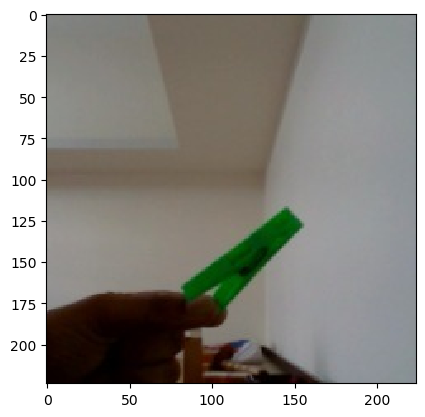

In [11]:
plt.imshow(green_img_sample)

In [12]:
green_img_sample.shape

(224, 224, 3)

In [21]:
image_shape = (224, 224, 3)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
# add arguments needed for ImageDataGenerator. Fill mode is set to nearest and the remaining parameters are set to False or zero.
# The image is normalized using the rescale value of 1/255
img_gen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=0,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None
)

# Training the model

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Activation,Flatten,Dropout

In [13]:
def create_model():
    model = tf.keras.Sequential([
    Conv2D(filters=32,kernel_size=(5,5),input_shape=(224,224,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=64,kernel_size=(4,4),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=256,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(3,activation='softmax')])
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [14]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 107, 107, 64)      32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 51, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 256)       2

In [386]:
# Generating training images using ImageDataGenerator
train_image_gen = img_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=8,
                                               class_mode='categorical')

Found 900 images belonging to 3 classes.


In [22]:
# Generating validation images using ImageDataGenerator
val_image_gen = img_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=8,
                                               class_mode='categorical',shuffle=False)

Found 300 images belonging to 3 classes.


In [388]:
# To save the weights after every epoch

checkpoint_path = "weights/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 8

# creating a callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, monitor='val_accuracy',verbose=1, save_freq = 'epoch')

model.save_weights(checkpoint_path.format(epoch=1))

In [389]:
model.fit(train_image_gen,epochs=10,validation_data=val_image_gen, callbacks=[cp_callback], verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 113 steps, validate for 38 steps
Epoch 1/10
112/113 [============================>.] - ETA: 0s - loss: 0.4729 - accuracy: 0.7982
Epoch 00001: saving model to weights/cp-0001.ckpt
113/113 [==============================] - 61s 536ms/step - loss: 0.4757 - accuracy: 0.7978 - val_loss: 0.3445 - val_accuracy: 0.8600
Epoch 2/10
112/113 [============================>.] - ETA: 0s - loss: 0.2928 - accuracy: 0.9238
Epoch 00002: saving model to weights/cp-0002.ckpt
113/113 [==============================] - 60s 535ms/step - loss: 0.2903 - accuracy: 0.9244 - val_loss: 0.5454 - val_accuracy: 0.8000
Epoch 3/10
112/113 [============================>.] - ETA: 0s - loss: 0.0467 - accuracy: 0.9832
Epoch 00003: saving model to weights/cp-0003.ckpt
113/113 [==============================] - 60s 534ms/step - loss: 0.0463 - accuracy: 0.9833 - val_loss: 0.1488 - val_accuracy: 0.9600
Epoch 4/10
112/113 [============================>.] - ETA: 0s - los

In [422]:
os.listdir(checkpoint_dir)

['checkpoint',
 'cp-0001.ckpt.data-00000-of-00001',
 'cp-0001.ckpt.index',
 'cp-0002.ckpt.data-00000-of-00001',
 'cp-0002.ckpt.index',
 'cp-0003.ckpt.data-00000-of-00001',
 'cp-0003.ckpt.index',
 'cp-0004.ckpt.data-00000-of-00001',
 'cp-0004.ckpt.index',
 'cp-0005.ckpt.data-00000-of-00001',
 'cp-0005.ckpt.index',
 'cp-0006.ckpt.data-00000-of-00001',
 'cp-0006.ckpt.index',
 'cp-0007.ckpt.data-00000-of-00001',
 'cp-0007.ckpt.index',
 'cp-0008.ckpt.data-00000-of-00001',
 'cp-0008.ckpt.index',
 'cp-0009.ckpt.data-00000-of-00001',
 'cp-0009.ckpt.index',
 'cp-0010.ckpt.data-00000-of-00001',
 'cp-0010.ckpt.index']

In [395]:
losses = pd.DataFrame(model.history.history)

In [396]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.473220,0.797778,0.344455,0.860000
1,0.291565,0.924444,0.545433,0.800000
2,0.046514,0.983333,0.148768,0.960000
3,0.000043,1.000000,0.284770,0.953333
4,0.000035,1.000000,0.247736,0.956667
5,0.000010,1.000000,0.263458,0.956667
6,0.000006,1.000000,0.276984,0.956667
7,0.000014,1.000000,0.235003,0.960000
8,0.000005,1.000000,0.268191,0.956667
9,0.000024,1.000000,0.176709,0.960000


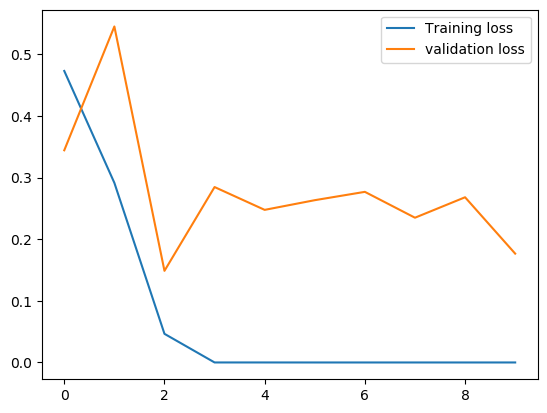

In [398]:
plt.plot(losses[['loss','val_loss']])
plt.legend(['Training loss','validation loss'])

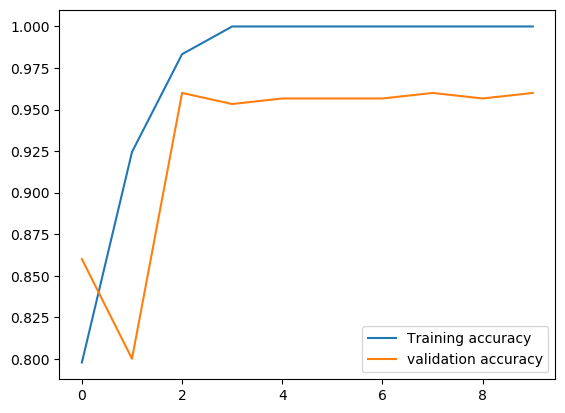

In [399]:
plt.plot(losses[['accuracy','val_accuracy']])
plt.legend(['Training accuracy','validation accuracy'])

# Loading the best weights and evaluating the test images generated with ImageDataGenerator

In [23]:
model.load_weights('weights/cp-0003.ckpt')

In [25]:
model.evaluate_generator(val_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[0.14876761910444872, 0.96]

In [28]:
predictions = model.predict(val_image_gen)

In [29]:
predictions

array([[9.99756038e-01, 1.98034380e-04, 4.59212570e-05],
       [9.99833703e-01, 1.38180229e-04, 2.81479424e-05],
       [9.99985933e-01, 1.21365038e-05, 1.87915680e-06],
       [9.99840617e-01, 1.43870930e-04, 1.54963727e-05],
       [9.99819934e-01, 1.59907780e-04, 2.01298717e-05],
       [9.99832511e-01, 1.37130090e-04, 3.03061133e-05],
       [9.99816000e-01, 1.65346064e-04, 1.87145470e-05],
       [9.99863148e-01, 1.13301379e-04, 2.34735780e-05],
       [9.99823511e-01, 1.56741895e-04, 1.98126800e-05],
       [9.99799907e-01, 1.77918380e-04, 2.21843293e-05],
       [9.99821961e-01, 1.59682721e-04, 1.83637840e-05],
       [9.99804080e-01, 1.74381887e-04, 2.15781929e-05],
       [9.99756515e-01, 1.97668807e-04, 4.58020513e-05],
       [9.99817073e-01, 1.65821562e-04, 1.71984957e-05],
       [9.99985456e-01, 1.25806791e-05, 1.94195263e-06],
       [9.99855518e-01, 1.19443095e-04, 2.50128869e-05],
       [9.99807656e-01, 1.83446784e-04, 8.98219150e-06],
       [9.99834418e-01, 1.35531

In [30]:
def prediction_classes(p):
    max_value  = 0
    maxi = 0
    for i in range(3):
        temp = p[i]
        if temp>max_value:
            max_value = temp
            maxi = i
    return maxi

In [31]:
predictions = map(prediction_classes, predictions)

pred = list(predictions)

In [32]:
pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [33]:
pred = np.array(pred)

In [34]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2])

In [35]:
val_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(val_image_gen.classes,pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       100
           1       1.00      0.99      0.99       100
           2       1.00      0.89      0.94       100

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [41]:
confusion_matrix_result = confusion_matrix(val_image_gen.classes,pred)
confusion_matrix_result

array([[100,   0,   0],
       [  1,  99,   0],
       [ 11,   0,  89]], dtype=int64)

In [45]:
confusion_matrix_result_pf = pd.DataFrame(confusion_matrix_result, columns = ['Background_class', 'Green_class', 'Orange_class'], index = ['Background_prediction', 'Green_prediction', 'Orange_prediction'])
confusion_matrix_result_pf

,Background_class,Green_class,Orange_class
Background_prediction,100,0,0
Green_prediction,1,99,0
Orange_prediction,11,0,89


# Evaluating the model with test images

In [46]:
from tensorflow.keras.preprocessing import image

In [47]:
#The images used for validation is used here but the images are not augmented now
predictions = []
Background_test_samples_len = len(os.listdir(directory+ "\\test"+ "\\Background_test_samples"))
print("No. of Background test samples: ",Background_test_samples_len)
green_test_samples_len = len(os.listdir(directory+ "\\test"+ "\\Green_test_samples"))
print("No. of green test samples: ",green_test_samples_len)
orange_test_samples_len = len(os.listdir(directory+ "\\test"+ "\\Orange_test_samples"))
print("No. of orange test samples: ",orange_test_samples_len)

No. of Background test samples:  100
No. of green test samples:  100
No. of orange test samples:  100


In [48]:
# Predicting background class
for i in range(Background_test_samples_len):
    prediction_image = directory+ "\\test"+ "\\Background_test_samples"+"\\"+str(i+1)+".jpg"
    prediction_image = image.load_img(prediction_image,target_size=(224,224,3))
    prediction_image = image.img_to_array(prediction_image)
    prediction_image = np.expand_dims(prediction_image,axis=0)
    prediction = model.predict_classes(prediction_image)
    predictions.append(prediction.item())

In [49]:
#predictions

In [50]:
# Predicting green samples
for i in range(green_test_samples_len):
    prediction_image = directory+ "\\test"+ "\\Green_test_samples"+"\\"+str(i+1)+".jpg"
    prediction_image = image.load_img(prediction_image,target_size=(224,224,3))
    prediction_image = image.img_to_array(prediction_image)
    prediction_image = np.expand_dims(prediction_image,axis=0)
    prediction = model.predict_classes(prediction_image)
    predictions.append(prediction.item())

In [51]:
#predictions

In [52]:
# Predicting orange samples
for i in range(orange_test_samples_len):
    prediction_image = directory+ "\\test"+ "\\Orange_test_samples"+"\\"+str(i+1)+".jpg"
    prediction_image = image.load_img(prediction_image,target_size=(224,224,3))
    prediction_image = image.img_to_array(prediction_image)
    prediction_image = np.expand_dims(prediction_image,axis=0)
    prediction = model.predict_classes(prediction_image)
    predictions.append(prediction.item())

In [53]:
# predictions of all classes combined
predictions = np.array(predictions)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
confusion_matrix_result = confusion_matrix(val_image_gen.classes,predictions)
confusion_matrix_result

array([[100,   0,   0],
       [  1,  99,   0],
       [  0,   2,  98]], dtype=int64)

In [55]:
confusion_matrix_result_pf = pd.DataFrame(confusion_matrix_result, columns = ['Background_class', 'Green_class', 'Orange_class'], index = ['Background_prediction', 'Green_prediction', 'Orange_prediction'])
confusion_matrix_result_pf

,Background_class,Green_class,Orange_class
Background_prediction,100,0,0
Green_prediction,1,99,0
Orange_prediction,0,2,98


# Testing the model with random test images

In [273]:
green_image_sample = directory+ "\\test"+ "\\Background_test_samples"+"\\2.jpg"

In [274]:
my_image = image.load_img(green_image_sample,target_size=(224,224,3))

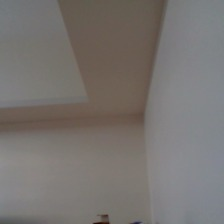

In [275]:
my_image

In [276]:
type(my_image)

PIL.JpegImagePlugin.JpegImageFile

In [277]:
my_image = image.img_to_array(my_image)

In [278]:
type(my_image)

numpy.ndarray

In [279]:
my_image = np.expand_dims(my_image,axis=0)

In [280]:
my_image.shape

(1, 224, 224, 3)

In [281]:
model.predict_classes(my_image)

array([0], dtype=int64)

In [282]:
test_image = directory+ "\\test"+ "\\Orange_test_samples"+"\\79.jpg"

In [283]:
test_image = image.load_img(test_image, target_size=(224,224,3))

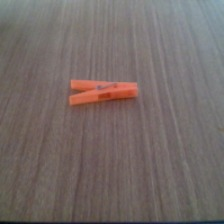

In [284]:
test_image

In [285]:
test_image = image.img_to_array(test_image)

In [286]:
test_image = np.expand_dims(test_image,axis=0)

In [287]:
model.predict_classes(test_image)

array([2], dtype=int64)

In [288]:
test_image = directory+ "\\test"+ "\\Green_test_samples"+"\\29.jpg"

In [289]:
test_image = image.load_img(test_image, target_size=(224,224,3))

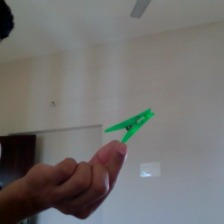

In [290]:
test_image

In [291]:
test_image = image.img_to_array(test_image)

In [292]:
test_image = np.expand_dims(test_image,axis=0)

In [293]:
model.predict_classes(test_image)

array([1], dtype=int64)